# Yulu Business Case Study- Hypothesis Testing

## The company wants to know:
    
    Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
    How well those variables describe the electric cycle demands

## Column Profiling:

    datetime: datetime
    season: season (1: spring, 2: summer, 3: fall, 4: winter)
    holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
    weather:
        1: Clear, Few clouds, partly cloudy, partly cloudy
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    temp: temperature in Celsius
    atemp: feeling temperature in Celsius
    humidity: humidity
    windspeed: wind speed
    casual: count of casual users
    registered: count of registered users
    count: count of total rental bikes including both casual and registered

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from numpy import NaN, nan, NAN
from scipy import stats
import statsmodels.api as sm
import warnings
from scipy.stats import shapiro
from scipy.stats import levene
warnings.filterwarnings("ignore")

### Loading data 

In [3]:
bike_data = pd.read_csv('bike_sharing.csv')
bike_data

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [4]:
bike_data.describe().transpose()

count        mean         std   min      25%      50%       75%  \
season      10886.0    2.506614    1.116174  1.00   2.0000    3.000    4.0000   
holiday     10886.0    0.028569    0.166599  0.00   0.0000    0.000    0.0000   
workingday  10886.0    0.680875    0.466159  0.00   0.0000    1.000    1.0000   
weather     10886.0    1.418427    0.633839  1.00   1.0000    1.000    2.0000   
temp        10886.0   20.230860    7.791590  0.82  13.9400   20.500   26.2400   
atemp       10886.0   23.655084    8.474601  0.76  16.6650   24.240   31.0600   
humidity    10886.0   61.886460   19.245033  0.00  47.0000   62.000   77.0000   
windspeed   10886.0   12.799395    8.164537  0.00   7.0015   12.998   16.9979   
casual      10886.0   36.021955   49.960477  0.00   4.0000   17.000   49.0000   
registered  10886.0  155.552177  151.039033  0.00  36.0000  118.000  222.0000   
count       10886.0  191.574132  181.144454  1.00  42.0000  145.000  284.0000   

                 max  
season        4.0000  
holiday       1.0000  
workingday    1.0000  
weather       4.0000  
temp         41.0000  
atemp        45.4550  
humidity    100.0000  
windspeed    56.9969  
casual      367.0000  
registered  886.0000  
count       977.0000

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
bike_data.shape

(10886, 12)

In [7]:
bike_data.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [8]:
bike_data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [9]:
bike_data.duplicated().sum()

0

In [10]:
bike_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### Insights
* There are 4 categorical  features namely season, holiday, workingday, weather 7 numerical/continuos features and 1 datetime object. In total 12 independant features with 10886 rows.
* No missing data or null values present neither any duplicate row is there


# Outlier detections and removal

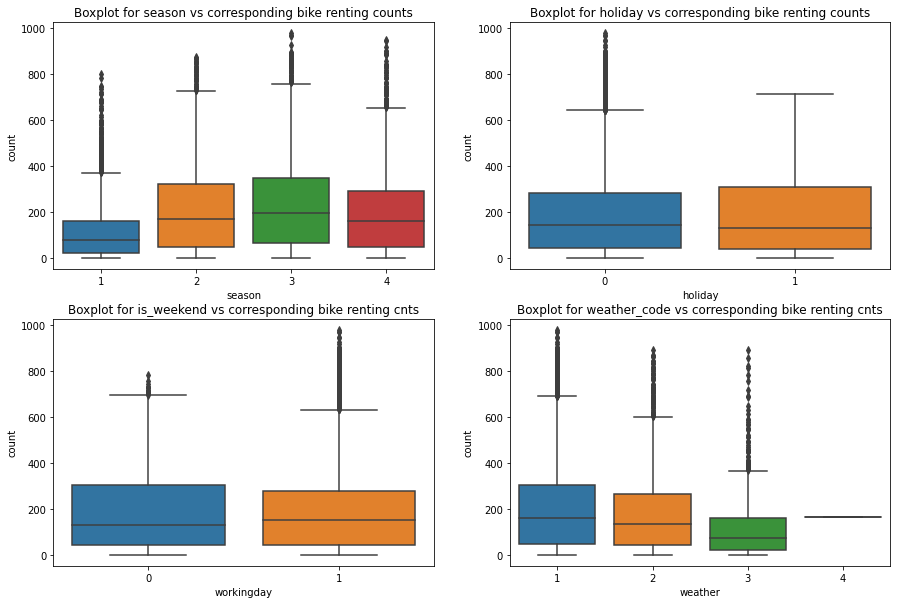

In [11]:
# Visualization before outlier removal
fig = plt.figure(figsize = (15,10))

ax1=fig.add_subplot(221)
sns.boxplot(x='season',y='count',data=bike_data)
ax1.set_title('Boxplot for season vs corresponding bike renting counts')

ax1=fig.add_subplot(222)
sns.boxplot(x='holiday',y='count',data=bike_data)
ax1.set_title('Boxplot for holiday vs corresponding bike renting counts')

ax1 = fig.add_subplot(223)
sns.boxplot(x = 'workingday', y = 'count', data = bike_data)
ax1.set_title('Boxplot for is_weekend vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.boxplot(x = 'weather', y = 'count', data = bike_data)
ax1.set_title('Boxplot for weather_code vs corresponding bike renting cnts')

plt.show()

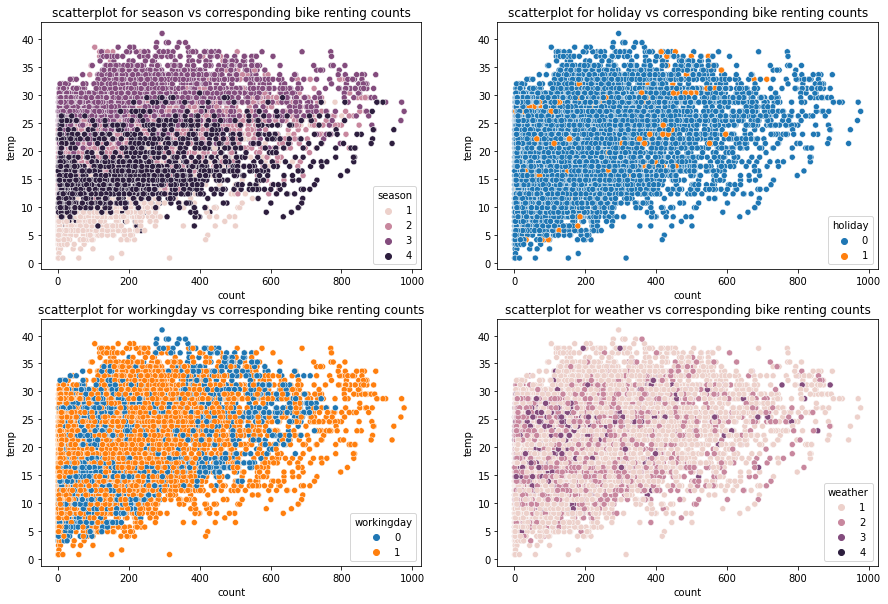

In [12]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'count', y = 'temp',data = bike_data, hue ='season' )
ax1.set_title('scatterplot for season vs corresponding bike renting counts')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='count', y = 'temp', data = bike_data, hue ='holiday')
ax1.set_title('scatterplot for holiday vs corresponding bike renting counts')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'count', y = 'temp',data = bike_data, hue ='workingday')
ax1.set_title('scatterplot for workingday vs corresponding bike renting counts')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'count',y = 'temp',data = bike_data, hue ='weather')
ax1.set_title('scatterplot for weather vs corresponding bike renting counts')

plt.show()

In [13]:
# Taking backup of original data before removing outliers
bike_dcopy = bike_data.copy()

In [14]:
q1=bike_data['count'].quantile(0.25)
q3=bike_data['count'].quantile(0.75)
iqr=q3-q1
bike_data = bike_data[(bike_data['count'] >= q1 - 1.5*iqr) & (bike_data['count'] <= q3 +1.5*iqr)]
bike_data.shape

(10586, 12)

In [15]:
bike_dcopy.shape[0] - bike_data.shape[0]

300

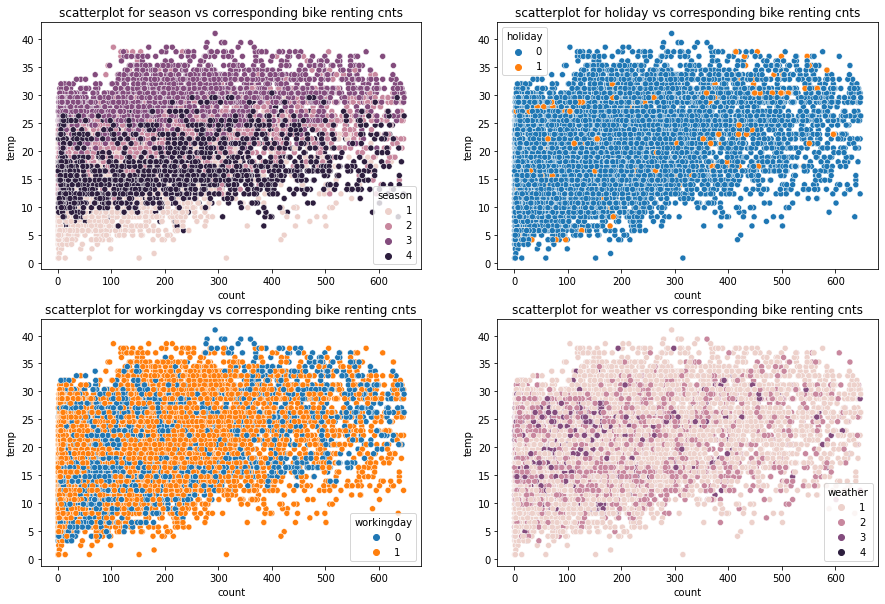

In [16]:
#Visualization after removing outliers
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(221)
sns.scatterplot(x = 'count', y = 'temp',data = bike_data, hue ='season' )
ax1.set_title('scatterplot for season vs corresponding bike renting cnts')

ax1 = fig.add_subplot(222)
sns.scatterplot(x ='count', y = 'temp', data = bike_data, hue ='holiday')
ax1.set_title('scatterplot for holiday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(223)
sns.scatterplot(x = 'count', y = 'temp',data = bike_data, hue ='workingday')
ax1.set_title('scatterplot for workingday vs corresponding bike renting cnts')

ax1 = fig.add_subplot(224)
sns.scatterplot(x = 'count',y = 'temp',data = bike_data, hue ='weather')
ax1.set_title('scatterplot for weather vs corresponding bike renting cnts')

plt.show()

### Insights 
* After dealing with the outliers, total of 300 rows are removed out off 10886 from the dataset, As we can see from the above scatterplot, the data now looks more clean

# Univariate and Bivariate analysis

In [17]:
#creating a new dataframe for indexing timestamp
bike_datatime = pd.read_csv('bike_sharing.csv')
bike_datatime

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [18]:
bike_dcopy["datetime"].sort_values() 

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [19]:
bike_dcopy['datetime'] = pd.to_datetime(bike_dcopy['datetime'])

bike_dcopy['year'] = bike_dcopy['datetime'].dt.year
bike_dcopy['month'] = bike_dcopy['datetime'].dt.month
bike_dcopy['day'] = bike_dcopy['datetime'].dt.day

In [20]:
np.sort(bike_dcopy[bike_dcopy['count'] >= bike_dcopy['count'].quantile(0.75)]['day'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [21]:
bike_dcopy[bike_dcopy['count'] >= bike_dcopy['count'].quantile(0.95)]['month'].unique()

array([ 5,  6,  7,  8,  9, 10,  3,  4, 11, 12], dtype=int64)

In [22]:
bike_dcopy['year'] = bike_dcopy['datetime'].dt.year

In [23]:
bike_dcopy['month'] = bike_dcopy['datetime'].dt.month

In [24]:
bike_dcopy.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  
0        81        0.0       3          13     16  2011      1    1  
1        80        0.0       8          32     40  2011      1    1  
2        80        0.0       5          27     32  2011      1    1  
3        75        0.0       3          10     13  2011      1    1  
4        75        0.0       0           1      1  2011      1    1

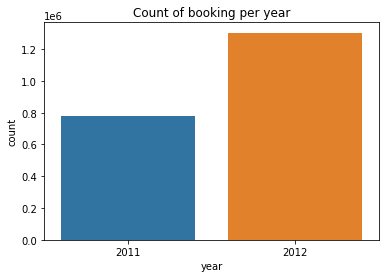

In [25]:
year_data = bike_dcopy.groupby(['year'])['count'].sum()
year_data = year_data.reset_index()
sns.barplot(x='year',y='count',data=year_data)
plt.title('Count of booking per year')
plt.show()

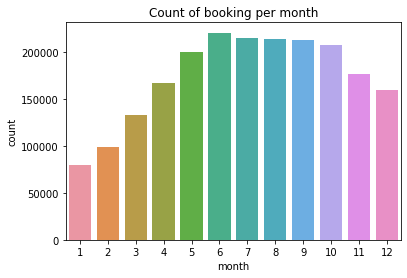

In [26]:
month_data = bike_dcopy.groupby(['month'])['count'].sum()
month_data = month_data.reset_index()
sns.barplot(x='month',y='count',data=month_data)
plt.title('Count of booking per month')
plt.show()

### Insights
* Highest booking is in the month of june
* Almost same booking for the month of may,jully,august,september,octomber and gradually decreasing for the rest of the month.
* The count is less during the cold months (November, December, January and February), where due to cold people prefer not to ride cycle 
* As we can see from the monthwise bar plot, the demand for the bikes at the starting of the month is quite low as compared to the months from march 2012 onwards. There's a drop in the middle owing to cold and winter season
* Almost every months has the same number of bookings

In [27]:
mon_year_data = bike_dcopy.groupby(['year','month'])['count'].sum()
mon_year_data = pd.DataFrame(mon_year_data)
mon_year_data.reset_index(inplace = True)
myy = mon_year_data.pivot('month','year','count').fillna(0)

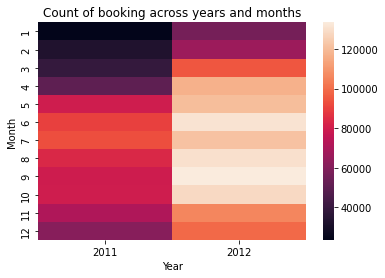

In [28]:
sns.heatmap(myy)
plt.title('Count of booking across years and months')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [29]:
#Univariate analysis for numerical/continuos variables
def num_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
    sns.histplot(col_data, kde=True, ax=ax[0], color = 'purple')
    ax[0].axvline(col_data.mean(), color='r', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='k', linestyle='dashed', linewidth=2)
    ax[0].axvline(col_data.mode()[0],color='y',linestyle='solid',linewidth=2)
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.tight_layout()

In [30]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10586 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10586 non-null  object 
 1   season      10586 non-null  int64  
 2   holiday     10586 non-null  int64  
 3   workingday  10586 non-null  int64  
 4   weather     10586 non-null  int64  
 5   temp        10586 non-null  float64
 6   atemp       10586 non-null  float64
 7   humidity    10586 non-null  int64  
 8   windspeed   10586 non-null  float64
 9   casual      10586 non-null  int64  
 10  registered  10586 non-null  int64  
 11  count       10586 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.0+ MB


In [31]:
bike_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [32]:
num_cols = ['temp','atemp','humidity','count','windspeed']
num_cols

['temp', 'atemp', 'humidity', 'count', 'windspeed']

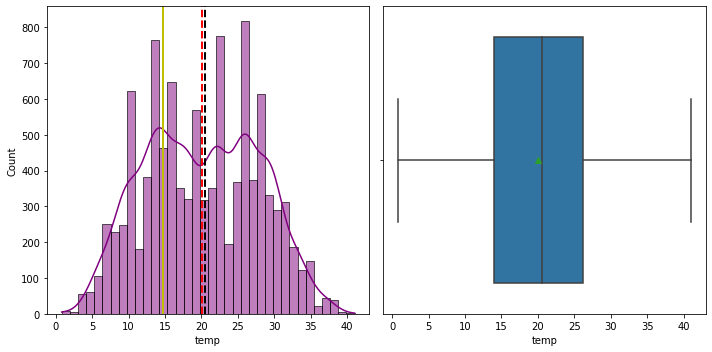

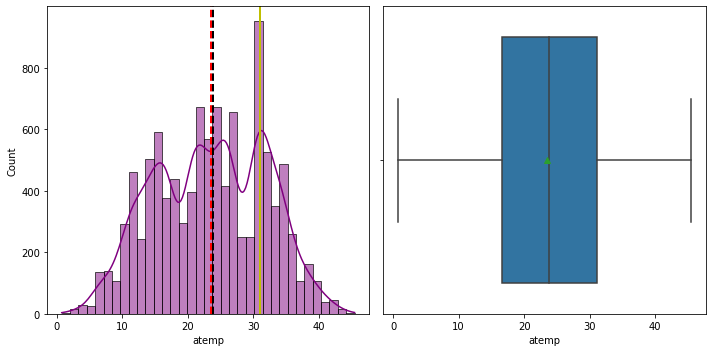

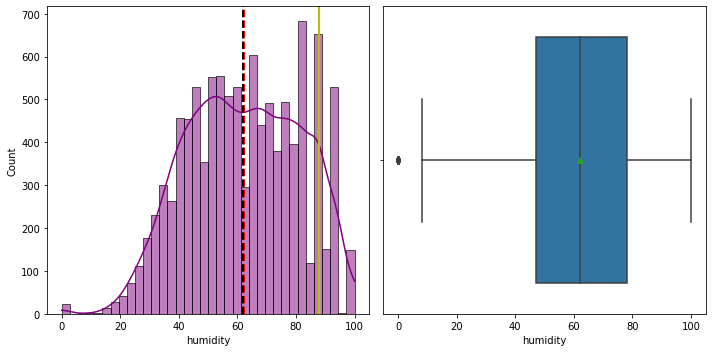

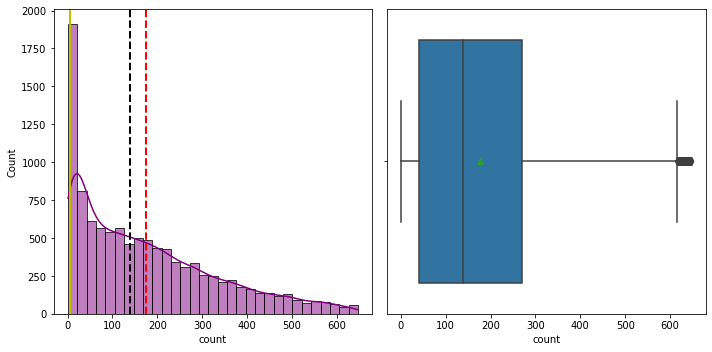

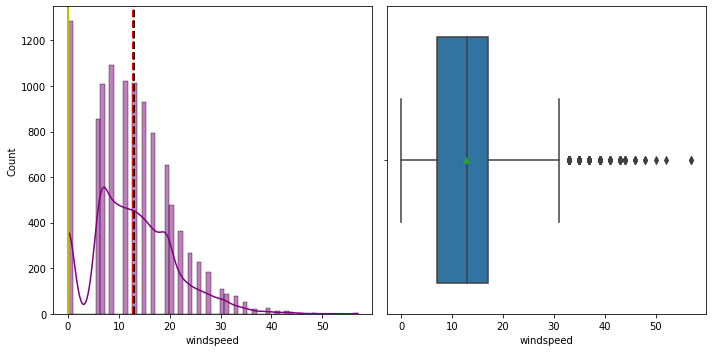

In [33]:
for i in num_cols:
    num_feat(bike_data[i])

### Insights 
* There are outliers in the windspeed and casual users which tells us that, the windspeed is not uniform
* The exponential decay curve for the count tells us that, as the users renting bikes increases the frequency decreases.

In [34]:
#EDA on Univariate Categorical variables
def cat_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    fig.suptitle(col_data.name+' wise sale',fontsize=15)
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)
    plt.tight_layout()

In [35]:
bike_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [36]:
cat_cols = ['season', 'holiday', 'workingday', 'weather']
cat_cols

['season', 'holiday', 'workingday', 'weather']

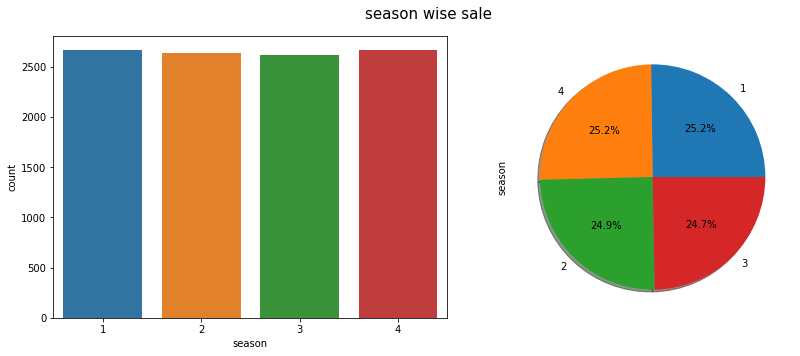

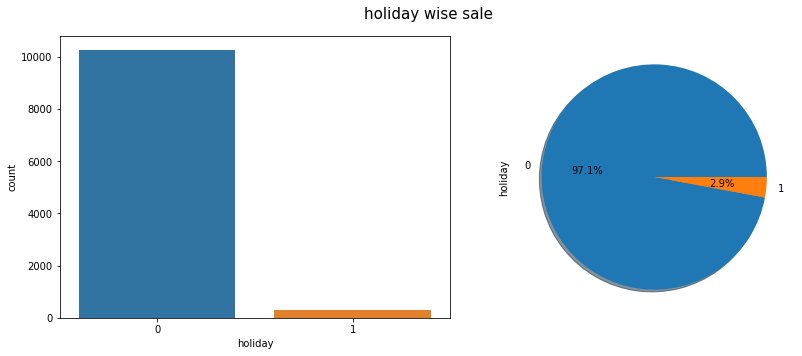

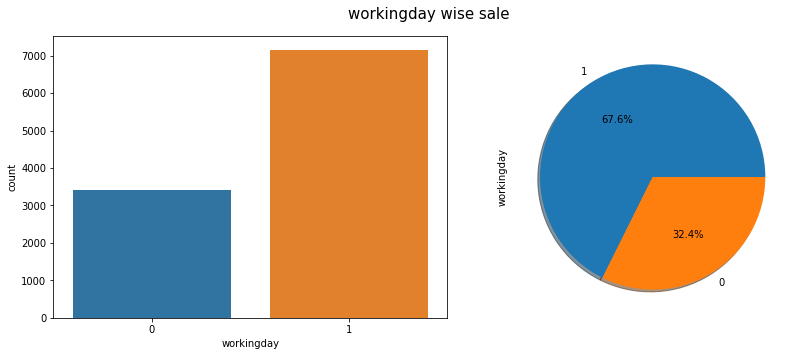

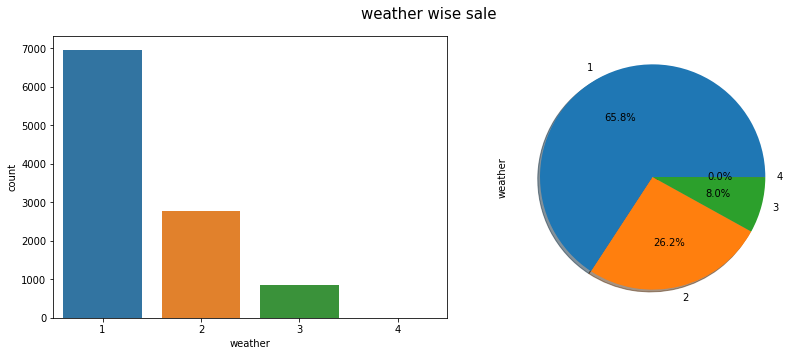

In [37]:
for i in cat_cols:
    cat_feat(bike_data[i])

### Insights
* For the weather (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) number of users renting the bikesis much low and hence it;s good to drop the feature while doing the further tests.
* When weather is good (Clear, Few clouds, partly cloudy, partly cloudy) people tend to rent more bikes
* Count of renting the bikes on working day is much higher than non-working day
* During Holidays people dont prefer to ride bikes
* During season (spring,summer,fall,winter) the count of renting the bikes is more or less

### Correlation between bivariate analysis

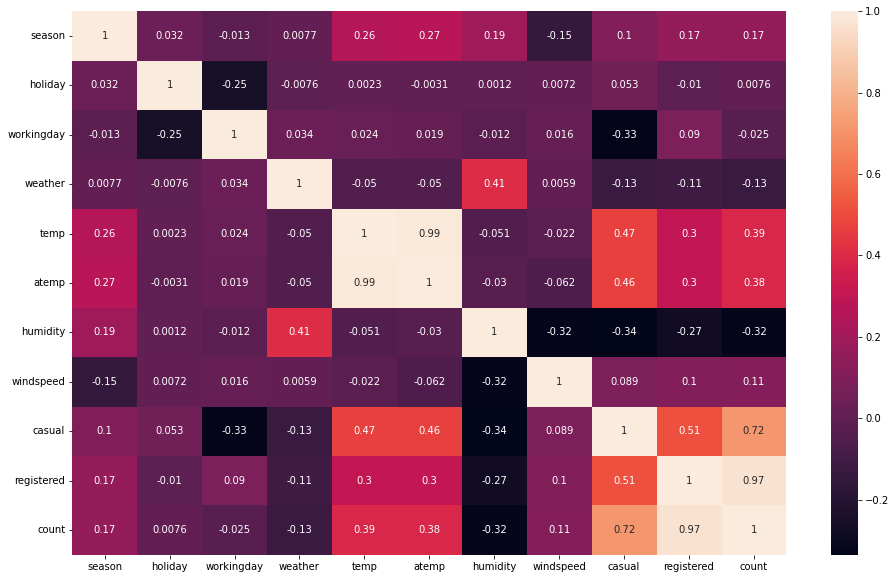

In [38]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_data.corr(),annot=True)
plt.show()

### Insights
* The Registered users has higher correlation as comapred to the casual user count
* The windspeed and season has very nearly zero positive correlation with the count which means, that means the windspeed and season didnt have any affect on the bike renting
* temp and atemp has moderate correlation with the count. People tend to go out on bright sunny day when the temp is normal whereas during the harsh condition such as during too hot or too cold there is a drop in the renting the bike
* When its holiday, user count is considerably low but when its working day user count is moderately high.

# 2 Sample T-Test

In [39]:
bike_data.shape

(10586, 12)

In [40]:
bike_data['workingday'].value_counts(normalize = True) * 100

1    67.645947
0    32.354053
Name: workingday, dtype: float64

In [41]:
bike_data['workingday'].value_counts()

1    7161
0    3425
Name: workingday, dtype: int64

In [42]:
working_data = bike_data[bike_data['workingday'] == 1].sample(replace = False)
non_working_data = bike_data[bike_data['workingday'] == 0].sample(replace = False)

In [43]:
round(working_data['count'].std()**2,2), round(non_working_data['count'].std()**2 ,2)

(nan, nan)

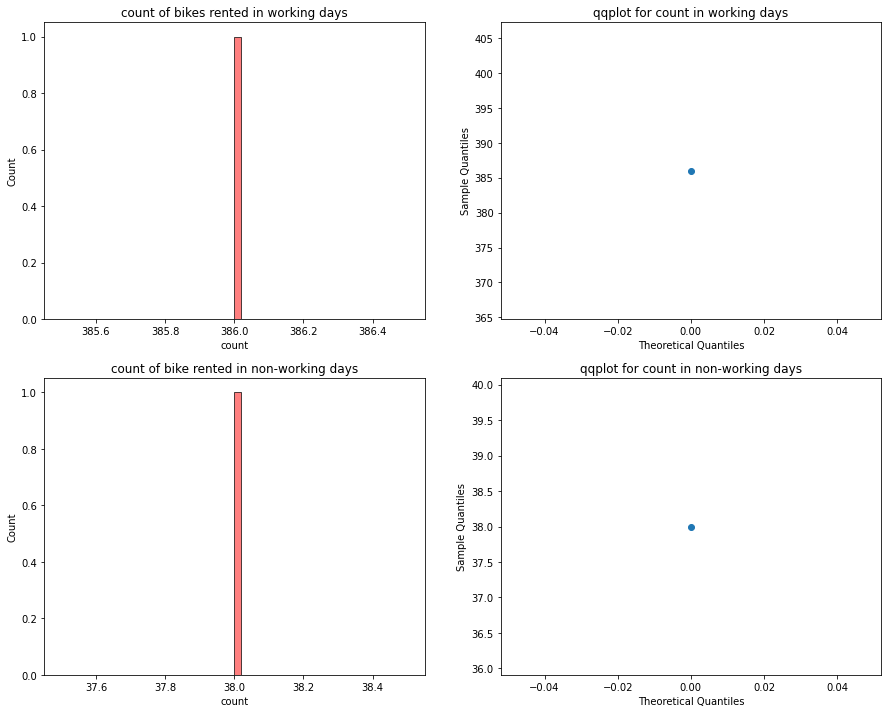

In [44]:
fig = plt.figure(figsize = (15,12))

ax1 = fig.add_subplot(221)
sns.histplot(data = working_data, x = 'count' , bins = 50, kde = True, ax = ax1, color = 'red')
ax1.set_title('count of bikes rented in working days')

ax2 = fig.add_subplot(222)
sm.qqplot(working_data['count'], line = 's', ax = ax2)
ax2.set_title('qqplot for count in working days')

ax3 = fig.add_subplot(223)
sns.histplot(data = non_working_data, x = 'count' , bins = 50, kde = True, ax = ax3, color = 'red')
ax3.set_title('count of bike rented in non-working days')

ax4 = fig.add_subplot(224)
sm.qqplot(non_working_data['count'], line = 's', ax = ax4)
ax4.set_title('qqplot for count in non-working days')

plt.show()


In [45]:
t_test, p_value = stats.ttest_ind(working_data['count'],non_working_data['count'],
                                  alternative='greater', equal_var = False)
t_test, p_value

(nan, nan)

### Insights
* As we are getting nan values and the distribution is also not in the normal form which violates the conditions for 2 sample test, Hence we reject the null hypothesis
* We got the p-Value as nan which should be p-Value<alpha(0.05), so after trying with the log to reject the null hypothesis.

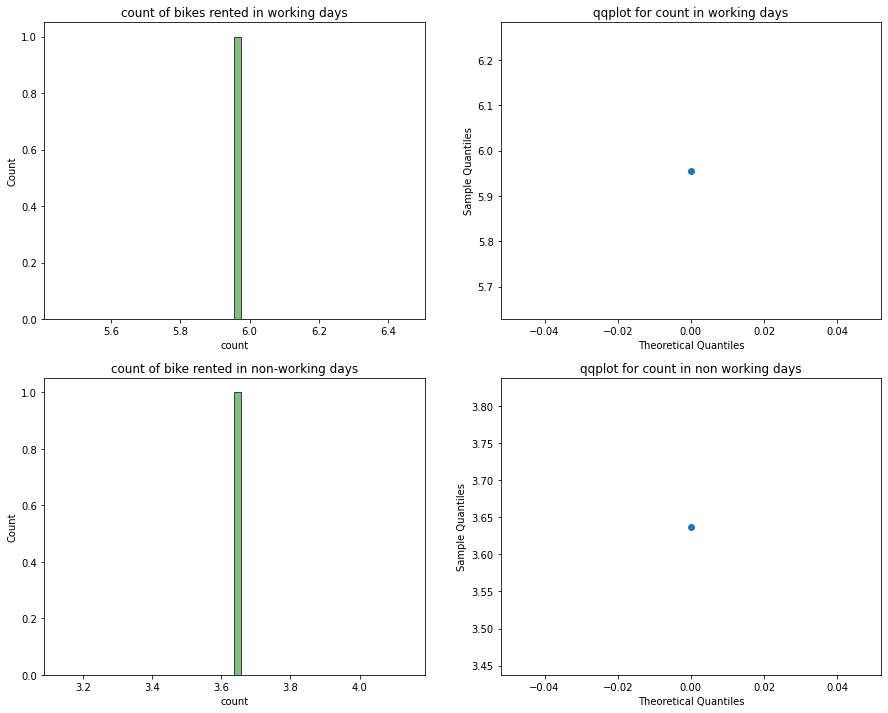

In [84]:
fig = plt.figure(figsize = (15,12))

ax1 = fig.add_subplot(221)
sns.histplot(data = np.log(working_data['count']) , bins = 50, kde = True, ax = ax1, color = 'green')
ax1.set_title('count of bikes rented in working days')

ax2 = fig.add_subplot(222)
sm.qqplot(np.log(working_data['count']), line = 's', ax = ax2)
ax2.set_title('qqplot for count in working days')

ax3 = fig.add_subplot(223)
sns.histplot(data = np.log(non_working_data['count']) , bins = 50, kde = True, ax = ax3, color  = 'green')
ax3.set_title('count of bike rented in non-working days')

ax4 = fig.add_subplot(224)
sm.qqplot(np.log(non_working_data['count']), line = 's', ax = ax4)
ax4.set_title('qqplot for count in non working days')

plt.show()

In [47]:
sample_w_log = np.log(working_data['count'])
sample_nw_log = np.log(non_working_data['count'])

In [48]:
statistic,p_value = stats.ttest_ind(sample_w_log,sample_nw_log , alternative = 'greater')
statistic,p_value

(nan, nan)

In [49]:
def htResult(p_value):
    significance_level = 0.05
    if p_value <= significance_level: 
        print('Reject NULL HYPOTHESIS') 
    else: 
        print('Fail to Reject NULL HYPOTHESIS')

In [50]:
htResult(p_value)

Fail to Reject NULL HYPOTHESIS


In [51]:
stats.levene(sample_w_log, sample_nw_log, center='median')

LeveneResult(statistic=nan, pvalue=nan)

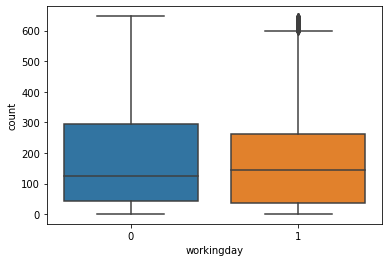

In [52]:
sns.boxplot(x='workingday', y='count', data=bike_data)
plt.show()


### Insights
* We are getting the p value as nan, so we are failing to reject the null hypothesis

# Chi Square

In [53]:
contigency_table = pd.crosstab(bike_data.weather,bike_data.season,margins=True,margins_name='Total')
contigency_table

season      1     2     3     4  Total
weather                               
1        1744  1721  1843  1657   6965
2         714   690   579   787   2770
3         211   223   195   221    850
4           1     0     0     0      1
Total    2670  2634  2617  2665  10586

In [54]:
contigency_table = contigency_table.rename(columns = {'Total':'Row_total'})
contigency_table

season      1     2     3     4  Row_total
weather                                   
1        1744  1721  1843  1657       6965
2         714   690   579   787       2770
3         211   223   195   221        850
4           1     0     0     0          1
Total    2670  2634  2617  2665      10586

In [55]:
n = contigency_table.at["Total", "Row_total"]
exp=contigency_table.copy()
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        v= (((contigency_table.at[x, "Row_total"]) * (contigency_table.at["Total", y]))/n ).round(2)
        exp.at[x,y]=float(v)

exp = exp.iloc[[0,1,2,3,4], [0,1,2,3]]
exp

season         1        2        3        4
weather                                    
1        1756.71  1733.03  1721.84  1753.42
2         698.65   689.23   684.78   697.34
3         214.39   211.50   210.13   213.99
4           0.25     0.25     0.25     0.25
Total    2670.00  2634.00  2617.00  2665.00

### Insights 
* Weather has expeted counts less than 5, so we will drop it.

In [56]:
bike_data['weather'].value_counts()

1    6965
2    2770
3     850
4       1
Name: weather, dtype: int64

In [57]:
bike_data['season'].value_counts()

1    2670
4    2665
2    2634
3    2617
Name: season, dtype: int64

In [58]:
bike_data=bike_data[~(bike_data['weather']==10.0)]
bike_data['weather'].value_counts()

1    6965
2    2770
3     850
4       1
Name: weather, dtype: int64

In [59]:
contigency_table = pd.crosstab(bike_data.weather,bike_data.season,margins=True,margins_name='Total')
contigency_table

season      1     2     3     4  Total
weather                               
1        1744  1721  1843  1657   6965
2         714   690   579   787   2770
3         211   223   195   221    850
4           1     0     0     0      1
Total    2670  2634  2617  2665  10586

### Insights
* Weather has expected counts less than 5 so again we will drop it

In [60]:
contigency_table = contigency_table.rename(columns = {'Total':'Row_total'})
contigency_table

season      1     2     3     4  Row_total
weather                                   
1        1744  1721  1843  1657       6965
2         714   690   579   787       2770
3         211   223   195   221        850
4           1     0     0     0          1
Total    2670  2634  2617  2665      10586

In [61]:
n = contigency_table.at["Total", "Row_total"]
exp=contigency_table.copy()
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        v= (((contigency_table.at[x, "Row_total"]) * (contigency_table.at["Total", y]))/n ).round(2)
        exp.at[x,y]=float(v)
exp = exp.iloc[[0,1,2,3,4], [0,1,2,3]]
exp = exp.iloc[[0,1,2,3, 4], [0, 1, 2, 3]]
exp

season         1        2        3        4
weather                                    
1        1756.71  1733.03  1721.84  1753.42
2         698.65   689.23   684.78   697.34
3         214.39   211.50   210.13   213.99
4           0.25     0.25     0.25     0.25
Total    2670.00  2634.00  2617.00  2665.00

In [62]:
weather_code_season_dep = pd.crosstab(bike_data['weather'], bike_data['season'])
weather_code_season_dep

season      1     2     3     4
weather                        
1        1744  1721  1843  1657
2         714   690   579   787
3         211   223   195   221
4           1     0     0     0

In [63]:
stat, p_value, dof, expected = stats.chi2_contingency(weather_code_season_dep)
stat, p_value, dof, expected
#stat, p, dof, expected


(47.17309400137371,
 3.643774770920206e-07,
 9,
 array([[1.75671169e+03, 1.73302569e+03, 1.72184064e+03, 1.75342197e+03],
        [6.98649159e+02, 6.89229171e+02, 6.84780843e+02, 6.97340828e+02],
        [2.14386926e+02, 2.11496316e+02, 2.10131305e+02, 2.13985452e+02],
        [2.52219913e-01, 2.48819195e-01, 2.47213301e-01, 2.51747591e-01]]))

In [64]:
alpha = 0.05
if p_value >= alpha: 
    print('We fail to reject the Null Hypothesis Ho and thus we can conclude that smokers proportion is not significantly different in different regions"')
else:
    print('We reject the Null Hypothesis Ho')

We reject the Null Hypothesis Ho


### Insights
* We can reject null hypothesis as we have enough number of proofs to reject null hypothesis, So it seems like weather and season are dependent on each other.

# Annova

In [65]:
bike_dcopy['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [66]:
def normality_check(series, alpha=0.05):
    _, p_value = shapiro(series)
    print(f'p value = {p_value}')
    if p_value >= alpha:
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

<AxesSubplot:xlabel='count', ylabel='Count'>

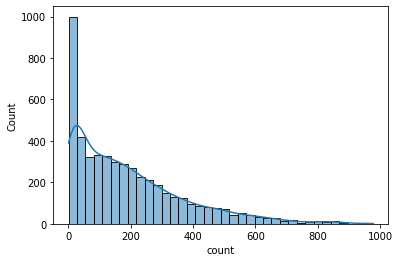

In [67]:
sns.histplot(bike_dcopy['count'].sample(5000), kde = True)

<AxesSubplot:xlabel='count', ylabel='Count'>

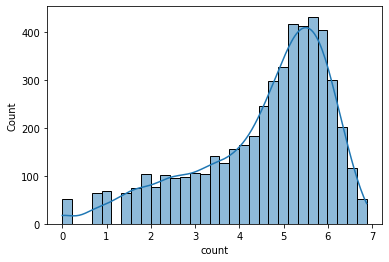

In [68]:
sns.histplot(np.log(bike_dcopy['count'].sample(5000)), kde = True)

In [69]:
stats.shapiro(bike_dcopy['count'].sample(5000))

ShapiroResult(statistic=0.8756839036941528, pvalue=0.0)

### Insights
* Even after taking log the distribution is not normal.

In [70]:
bike_dcopy=bike_dcopy[~(bike_dcopy['weather']==10.0) ] 
bike_dcopy=bike_dcopy[~(bike_dcopy['weather']==26.0) ]

In [71]:
bike_dcopy['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [72]:
normality_check(bike_dcopy['weather'].sample(1400, replace = True))

p value = 0.0
We reject the Null Hypothesis Ho


In [73]:
bike_dcopy.groupby(['weather'])['count'].describe()

count        mean         std    min    25%    50%    75%    max
weather                                                                   
1        7192.0  205.236791  187.959566    1.0   48.0  161.0  305.0  977.0
2        2834.0  178.955540  168.366413    1.0   41.0  134.0  264.0  890.0
3         859.0  118.846333  138.581297    1.0   23.0   71.0  161.0  891.0
4           1.0  164.000000         NaN  164.0  164.0  164.0  164.0  164.0

In [74]:
def variance_check(series1, series2, series3,series4,series5, alpha=0.05):
    _, p_value = levene(series1, series2, series3)
    print(f'p value = {p_value}')
    if (p_value >= alpha).all():
        print('We fail to reject the Null Hypothesis Ho')
    else:
        print('We reject the Null Hypothesis Ho')

In [75]:
series1 = bike_dcopy[bike_dcopy['weather'] == 1]['count']
series2 = bike_dcopy[bike_dcopy['weather'] == 2]['count']
series3 = bike_dcopy[bike_dcopy['weather'] == 3]['count']
series4 = bike_dcopy[bike_dcopy['weather'] == 4]['count']
series5 = bike_dcopy[bike_dcopy['weather'] == 7]['count']

In [76]:
variance_check(series1, series2, series3,series4,series5)

p value = 6.198278710731511e-36
We reject the Null Hypothesis Ho


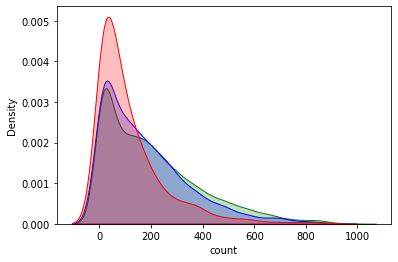

In [77]:
sns.kdeplot(series1,color = 'green',shade='green')
sns.kdeplot(series2,color = 'blue',shade = 'blue')
sns.kdeplot(series3,color = 'red',shade = 'red')
sns.kdeplot(series4,color = 'yellow',shade = 'yellow')
sns.kdeplot(series5,color = 'orange',shade = 'orange')
plt.show()

In [78]:
stat,p = stats.f_oneway(bike_dcopy[bike_dcopy['weather'] == 1]['count'],
                        bike_dcopy[bike_dcopy['weather'] == 2]['count'],
                        bike_dcopy[bike_dcopy['weather'] == 3]['count'],
                       bike_dcopy[bike_dcopy['weather'] == 4]['count'],
                       bike_dcopy[bike_dcopy['weather'] == 7]['count'])
stat,p

(nan, nan)

In [79]:
test, p_val= stats.levene(bike_dcopy[bike_dcopy['weather'] == 1]['count'],
                        bike_dcopy[bike_dcopy['weather'] == 2]['count'],
                        bike_dcopy[bike_dcopy['weather'] == 3]['count'],
                       bike_dcopy[bike_dcopy['weather'] == 4]['count'],
                       bike_dcopy[bike_dcopy['weather'] == 7]['count'])
test, p_val

(nan, nan)

### Insights
* As we are getting nan values for both the test and P value where P-value<alpha(0.05) and we cant predict the value of p, we reject HO, thus we can say that count of bikes differ with a change in weather

# Checking for season

In [80]:
bike_dcopy['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [81]:
bike_dcopy.groupby(['season'])['count'].describe()

count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

In [82]:
stat,p = stats.f_oneway(bike_dcopy[bike_dcopy['season'] == 1]['count'],
                        bike_dcopy[bike_dcopy['season'] == 2]['count'],
                        bike_dcopy[bike_dcopy['season'] == 3]['count'],
                       bike_dcopy[bike_dcopy['season'] == 4]['count'],
                       bike_dcopy[bike_dcopy['season'] == 7]['count'])
stat,p

(nan, nan)

In [83]:
test, p_val= stats.levene(bike_dcopy[bike_dcopy['season'] == 1]['count'],
                        bike_dcopy[bike_dcopy['season'] == 2]['count'],
                        bike_dcopy[bike_dcopy['season'] == 3]['count'],
                       bike_dcopy[bike_dcopy['season'] == 4]['count'],
                       bike_dcopy[bike_dcopy['season'] == 7]['count'])
test, p_val

(nan, nan)

### Insights
* As we are getting nan values for both the test and P value where P-value<alpha(0.05) and we cant predict the value of p, we reject Ho, thus we can say that count of bikes differ with a change in weather

# Recommendations and Insights
# Recommendations and Insights
* There are 4 categorical  features namely season, holiday, workingday, weather 7 numerical/continuos features and 1 datetime object. In total 12 independant features with 10886 rows.
* No missing data or null values present neither any duplicate row is there
* After dealing with the outliers, total of 300 rows are removed out off 10886 from the dataset, As we can see from the above scatterplot, the data now looks more clean
* Highest booking is in the month of june
* Almost same booking for the month of may,jully,august,september,octomber and gradually decreasing for the rest of the month.
* The count is less during the cold months (November, December, January and February), where due to cold people prefer not to ride cycle 
* As we can see from the monthwise bar plot, the demand for the bikes at the starting of the month is quite low as compared to the months from march 2012 onwards. There's a drop in the middle owing to cold and winter season
* Almost every months has the same number of bookings
* There are outliers in the windspeed and casual users which tells us that, the windspeed is not uniform
* The exponential decay curve for the count tells us that, as the users renting bikes increases the frequency decreases.
* For the weather (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) number of users renting the bikesis much low and hence it;s good to drop the feature while doing the further tests.
* When weather is good (Clear, Few clouds, partly cloudy, partly cloudy) people tend to rent more bikes
* Count of renting the bikes on working day is much higher than non-working day
* During Holidays people dont prefer to ride bikes
* During season (spring,summer,fall,winter) the count of renting the bikes is more or less
* The Registered users has higher correlation as comapred to the casual user count
* The windspeed and season has very nearly zero positive correlation with the count which means, that means the windspeed and season didnt have any affect on the bike renting
* temp and atemp has moderate correlation with the count. People tend to go out on bright sunny day when the temp is normal whereas during the harsh condition such as during too hot or too cold there is a drop in the renting the bike
* When its holiday, user count is considerably low but when its working day user count is moderately high.
* Weather has expeted counts less than 5, so we will drop it.
* We are getting the p value as nan, so we are failing to reject the null hypothesis
* Weather has expected counts less than 5 so again we will drop it.
* We can reject null hypothesis as we have enough number of proofs to reject null hypothesis, So it seems like weather and season are dependent on each other
* Even after taking log the distribution is not normal
* As we are getting nan values for both the test and P value where P-value<alpha(0.05) and we cant predict the value of p, we reject HO, thus we can say that count of bikes differ with a change in weather
* As we are getting nan values for both the test and P value where P-value<alpha(0.05) and we cant predict the value of p, we reject Ho, thus we can say that count of bikes differ with a change in weather
### 2 Sample T-Test
* The distribution is not normal which violates conditions for conducting 2 sample t test. Also the varaince of the samples is unequal. Hence we will do log-transformation
* We got a p-value nan which we cant predict whether greater than or less than 0.05 and hence we can say that we can accept the null hypothesis. We will confirm after log - transformation as well.
* After taking log, we still cant get a near normal distribution with inequal variance. So we can calculate the p-value and test-statistics.
* Conclusion : As the p value is nan we failed to reject the null hypothesis.
##

    
##### In order to conclude, we can say that the major factors affecting the count of bikes rented are season and weather. The working and non working days can't be considered as a significant factor in predicting the future of rental business. At the same time, the business team must focus on the months other than winter months for increasing the bike parking zones as during the winter months of (Nov, Dec, Jan, Feb), theres's a considerable dip in the count. So the team can utilize these months for serving some other purpose such as renting electric cars, etc which can be a comfortable means for commute in cold.